# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
titles  = pd.read_csv('titles.csv')
cast    = pd.read_csv('cast.csv')
release = pd.read_csv('release_dates.csv')
release_dates = release

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation. 

In [7]:
summary = pd.DataFrame({
    "File": ["titles.csv", "release_dates.csv", "cast.csv"],
    "Rows": [len(titles), len(release), len(cast)],
    "Columns": [titles.shape[1], release.shape[1], cast.shape[1]],
    "Year Range": [
        f"{titles['year'].min()}–{titles['year'].max()}",
        f"{release['year'].min()}–{release['year'].max()}",
        f"{cast['year'].min()}–{cast['year'].max()}",
    ],
})
display(summary)

,File,Rows,Columns,Year Range
0,titles.csv,226013,2,1894–2115
1,release_dates.csv,443486,4,1894–2115
2,cast.csv,3442902,6,1894–2115


In [8]:
print("\nPreview: titles.csv")
display(titles.head())

print("\nPreview: release_dates.csv")
display(release.head())

print("\nPreview: cast.csv")
display(cast.head())


Preview: titles.csv


,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993



Preview: release_dates.csv


,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21



Preview: cast.csv


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [9]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226013 entries, 0 to 226012
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   title   226012 non-null  object
 1   year    226013 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [10]:
cast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3442902 entries, 0 to 3442901
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   title      object 
 1   year       int64  
 2   name       object 
 3   type       object 
 4   character  object 
 5   n          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 157.6+ MB


In [11]:
release.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443486 entries, 0 to 443485
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    443485 non-null  object
 1   year     443486 non-null  int64 
 2   country  443486 non-null  object
 3   date     443486 non-null  object
dtypes: int64(1), object(3)
memory usage: 13.5+ MB


### 2. How many movies have the title North by Northwest

In [13]:
nbnw_count = (titles['title'] == 'North by Northwest').sum()
print(f"Number of movies titled 'North by Northwest': {nbnw_count}")

Number of movies titled 'North by Northwest': 1


### 3. How many version of Hamlet are there, when was the first made? the last?

In [15]:
hamlet = titles[titles['title'] == 'Hamlet']

# Summary stats
hamlet_count = len(hamlet)
hamlet_first = int(hamlet['year'].min())
hamlet_last  = int(hamlet['year'].max())


# Print
print(f"Number of versions of 'Hamlet': {hamlet_count}")
print(f"First version year: {hamlet_first}")
print(f"Most recent version year: {hamlet_last}")

#'Hamlet' movies sorted by year
display(hamlet.sort_values('year'))

Number of versions of 'Hamlet': 20
First version year: 1910
Most recent version year: 2017


,title,year
79939,Hamlet,1910
129673,Hamlet,1911
164637,Hamlet,1913
221419,Hamlet,1921
221201,Hamlet,1948
220568,Hamlet,1954
113670,Hamlet,1964
73929,Hamlet,1969
204180,Hamlet,1973
64116,Hamlet,1976


#### 4. List all the movies called Treasure Island from oldest to newest

In [25]:
ti = titles[titles["title"] == "Treasure Island"].sort_values('year')
print(f"Total 'Treasure Island' titles: {len(ti)}")

display(ti)

Total 'Treasure Island' titles: 8


,title,year
180911,Treasure Island,1918
108853,Treasure Island,1920
87953,Treasure Island,1934
126321,Treasure Island,1950
190233,Treasure Island,1972
122150,Treasure Island,1973
52099,Treasure Island,1985
36752,Treasure Island,1999


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [28]:
counts = titles[(titles["year"] == 1950) | 
                (titles["year"] == 1980) | 
                (titles["year"] == 2000)]["year"].value_counts()

print("Movies made in selected years:")
print(counts)

Movies made in selected years:
year
2000    2568
1980    1750
1950    1109
Name: count, dtype: int64


The number of films produced increased substantially over time. In 1950, there were approx. 1100 films released, compared to around 1750 in 1980 and about 2560 in 2000. This upward trend suggests that the film industry expanded  and grew over the second half of the 20th century, due to various reasons such as improvements in production technology, increased global demand for entertainment, and the growth of international and independent film spaces.

### 6. How big was the cast of Metropolis


In [32]:
# Cast data for Metropolis
metropolis_cast = cast[cast["title"] == "Metropolis"]

# Count of cast members
cast_size = metropolis_cast["name"].nunique()

print(f"The cast of 'Metropolis' had {cast_size} members.")

The cast of 'Metropolis' had 31 members.


### 7. How many roles for actors were there 1950's? 1990's

In [35]:
roles_1950s = cast[(cast["type"] == "actor") & (cast["year"] >= 1950) & (cast["year"] <= 1959)]
roles_1990s = cast[(cast["type"] == "actor") & (cast["year"] >= 1990) & (cast["year"] <= 1999)]

count_1950s = len(roles_1950s)
count_1990s = len(roles_1990s)

print("Actor roles in the 1950s:", count_1950s)
print("Actor roles in the 1990s:", count_1990s)

Actor roles in the 1950s: 153559
Actor roles in the 1990s: 245713


### 8. How many roles for actors & actresses over time? Output should be a line graph

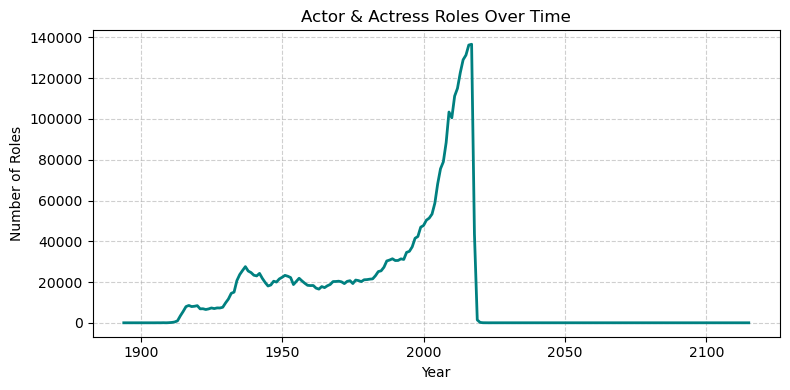

In [38]:
# Filter for actor/actress roles
roles = cast[cast["type"].isin(["actor", "actress"])]

# Roles per year
roles_by_year = roles.groupby("year")["name"].count().sort_index()

# Plotting graph
plt.figure(figsize=(8, 4))
plt.plot(roles_by_year.index, roles_by_year.values, color="teal", linewidth=2)
plt.title("Actor & Actress Roles Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Roles")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [41]:
leading_roles_2000s = cast[(cast["year"] >= 2000) & (cast["year"] <= 2009) & (cast["n"] == 1.0)]

count_leading_roles = len(leading_roles_2000s)

print(f"Number of leading roles in the 2000s: {count_leading_roles}")

Number of leading roles in the 2000s: 23593


### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [44]:
no_rank_2000s = cast[(cast['year'].between(2000,2009)) & (cast['n'].isnull())].shape[0]
no_rank_1950s = cast[(cast['year'].between(1950,1959)) & (cast['n'].isnull())].shape[0]
no_rank_2000s, no_rank_1950s

print(f"Unranked roles in the 2000s: {no_rank_2000s}")
print(f"Unranked roles in the 1950s: {no_rank_1950s}")

Unranked roles in the 2000s: 232037
Unranked roles in the 1950s: 95406


There were far more unranked roles in the 2000s (~232k) compared to the 1950s (~95k). This suggests that cast lists in more recent decades include more minor, background, or uncredited roles. It can also be that films in the 2000s tended to have larger casts and which made it hard to keep track of everyone and now we have better tools for that.

### 11. Plot the number of films made in each decade

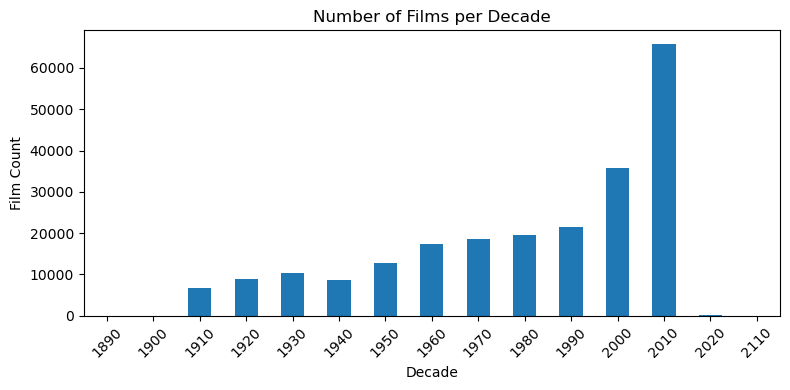

In [48]:
titles['decade'] = titles['year'] // 10 * 10
decade_counts = titles.groupby('decade')['title'].count().sort_index()

# Plotting graph
plt.figure(figsize=(8,4))
decade_counts.plot(kind="bar")
plt.title("Number of Films per Decade")
plt.xlabel("Decade")
plt.ylabel("Film Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 12. Plot the number of films with a Rustler character over time

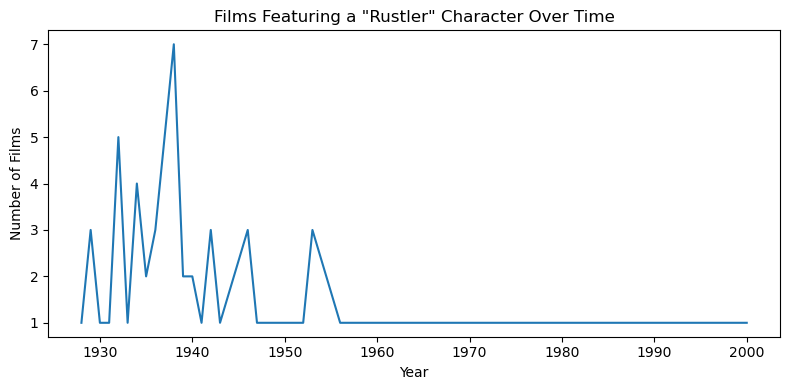

In [51]:
rustler = cast[cast["character"] == "Rustler"]
counts_by_year = rustler.groupby("year")["title"].nunique().sort_index()


# Plotting graph
plt.figure(figsize=(8,4))
plt.plot(counts_by_year.index, counts_by_year.values)
plt.title('Films Featuring a "Rustler" Character Over Time')
plt.xlabel('Year'); plt.ylabel('Number of Films')
plt.tight_layout(); plt.show()


### 13. What are the top ten character names of all time?

In [54]:
top_characters = cast["character"].value_counts().head(10)
print(top_characters)

character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Name: count, dtype: int64


### 14. Which actor appeared in the most films in the 1990's decade?

In [56]:
actors_90s = cast[(cast["type"] == "actor") & (cast["year"] >= 1990) & (cast["year"] <= 1999)]
counts = actors_90s.groupby("name")["title"].nunique().sort_values(ascending=False)

print(counts.head(1))

name
Shakti Kapoor    130
Name: title, dtype: int64


### 15. What are the top 10 roles that start with Science?

In [60]:
mask = cast["character"].astype(str).str.startswith("Science")
print(cast.loc[mask, "character"].value_counts().head(10))

character
Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: count, dtype: int64


### 16. What film has the largest cast

In [63]:
cast_sizes = cast.groupby(["title", "year"])["name"].nunique()
largest_cast = cast_sizes.sort_values(ascending=False).head(1)

print("Film with the largest cast:")
print(largest_cast)

Film with the largest cast:
title                        year
Around the World in 80 Days  1956    1299
Name: name, dtype: int64


### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [66]:
cast_size = cast.groupby(["title", "year"])["name"].nunique()

print(cast_size.describe())

count    182497.000000
mean         18.553620
std          20.699481
min           1.000000
25%           6.000000
50%          12.000000
75%          24.000000
max        1299.000000
Name: name, dtype: float64


The average film cast size is around 19 actors, but the median is only 12, which means that most films have relatively small casts. However, the maximum cast size is extremely large (1299), which shows that a few films include a huge numbers of credited roles. Most movies have small to medium casts and only a small number have very large casts.

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [70]:
np_films = (
    cast[cast["name"] == "Natalie Portman"]
    .groupby("year")["title"]
    .nunique()
    .sort_index()
)

print(np_films)

year
1995    1
1996    3
1999    2
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    1
2007    3
2008    1
2009    2
2010    3
2011    3
2013    1
2015    4
2016    3
2017    1
Name: title, dtype: int64


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [73]:
print(
    cast[(cast["name"] == "Natalie Portman") & ((cast["n"] == 1.0) | (cast["n"] == 2.0))]
        .groupby("year")["title"].nunique()
        .sort_index()
)

year
1999    1
2000    1
2002    1
2005    3
2006    1
2007    1
2008    1
2009    1
2010    1
2011    2
2013    1
2015    2
2016    2
Name: title, dtype: int64


### 20. Determine how many roles for actor or actress by decade. Plot the output 

decade
1890          3
1900         70
1910      43129
1920      71938
1930     198570
1940     210670
1950     209890
1960     182616
1970     202992
1980     257683
1990     361218
2000     676027
2010    1027836
2020        257
2110          3
dtype: int64


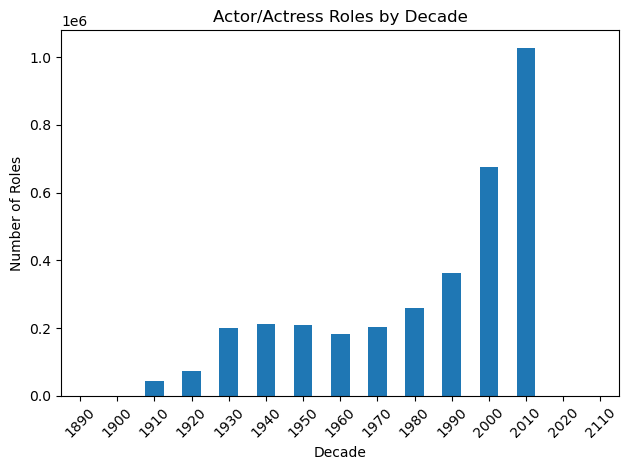

In [76]:
aa = cast[(cast["type"] == "actor") | (cast["type"] == "actress")]

# Decade and counts
aa["decade"] = (aa["year"] // 10) * 10
counts = aa.groupby("decade").size().sort_index()

print(counts)

# Plotting graph
counts.plot(kind="bar")
plt.title("Actor/Actress Roles by Decade")
plt.xlabel("Decade"); plt.ylabel("Number of Roles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='decade'>

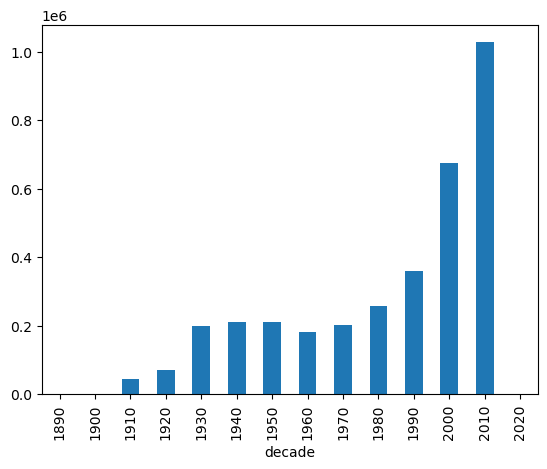

In [78]:
# Removing future data entry for 2110
counts = counts[counts.index <= 2020]
counts.plot(kind="bar")

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [81]:
release = pd.read_csv('release_dates.csv')

release['date'] = pd.to_datetime(release['date'], errors='coerce')
release = release[release['date'].notna()].set_index('date')
release

,title,year,country
date,,,
2007-06-15,"#73, Shaanthi Nivaasa",2007,India
2017-10-12,#BKKY,2016,Cambodia
2015-01-29,#Beings,2015,Romania
2017-09-05,#Captured,2017,USA
2015-01-21,#Ewankosau saranghaeyo,2015,Philippines
...,...,...,...
2005-04-29,xXx: State of the Union,2005,Uruguay
2005-06-03,xXx: State of the Union,2005,Poland
2005-06-03,xXx: State of the Union,2005,Turkey


This table counts every release record, so movies may appear more than once.  Releases happen mostly on Fridays, followed by Thursdays and Wednesdays, which aligns with studios targeting weekend revenue.  Sundays have the fewest releases, as they fall at the end of the weekend when audience turnout is low.

Across months, release activity is fairly spread out, but it is generally higher in January, March, October, and December, while summer months like July and August have fewer releases.

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

<Axes: xlabel='date'>

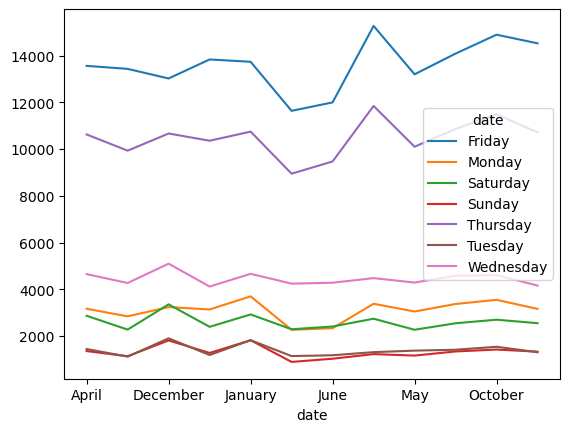

In [85]:
pd.pivot_table(release, index=release.index.month_name(), columns=release.index.day_name(), aggfunc='size').plot()

The plot is not correct because it counts every release entry, including re-releases and international release dates, so many movies are counted multiple times. This means the chart shows release activity, not the number of unique films released. Also, the months are not in calendar order, which makes the line chart visually misleading.

<Axes: title={'center': 'First Releases by Month and Day of Week'}, xlabel='date'>

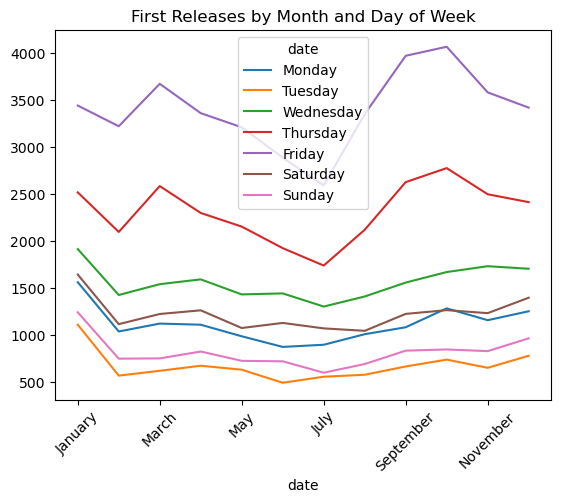

In [88]:
# Correcting data and graphing
cutoff = pd.Timestamp('today')
r = pd.read_csv('release_dates.csv')
r['date'] = pd.to_datetime(r['date'], errors='coerce')
first = (r[r['date'].notna() & (r['date'] <= cutoff)]
         .dropna(subset=['year'])
         .sort_values('date')
         .groupby(['title','year'], as_index=False)['date'].first()
         .set_index('date'))

day_order   = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

pivot = (pd.pivot_table(first, values= 'title',
                        index=first.index.month_name(),
                        columns=first.index.day_name(),
                        aggfunc='count')
         .reindex(index=month_order, columns=day_order))


pivot.plot(rot=45, title='First Releases by Month and Day of Week')

This corrected chart counts each film only once and is based on its first release date, so it shows when movies actually tend to be released rather than when they were re-issued or distributed. After removing duplicates, the pattern remains consistent: Friday is the most common release day, with Thursday also frequently used for early premieres. Sunday continues to be the least common release day.

Across months, releases are more concentrated in January, March, September, and November, which align with post-holiday openings, festival/awards season rollouts, and the lead-up to the holiday movie market. In contrast, July shows fewer first releases, reflecting that summer tends to focus on a few large blockbuster titles rather than many new releases.

### 23. What films did actors in Star Wars go on to appear in? 

In [106]:
sw77 = (cast[(cast["title"] == "Star Wars") & (cast["year"] == 1977) & 
             (cast["type"].isin(["actor", "actress"]))][["name"]]
        .drop_duplicates())
sw77

,name
59909,David Ankrum
82411,Graham Ashley
91760,Mark Anthony Austin
110035,Kenny Baker
145346,Scott Beach
...,...
3028315,Mandy Morton
3185175,Pam Rose
3252538,Erica Simmons
3277739,Angela Staines


In [104]:
future_roles = (cast.merge(sw77, on="name", how="inner")
                  .query("year > 1977 and type in ['actor','actress']")
                  .drop_duplicates(subset=["name", "title", "year"])
                  .sort_values(["name", "year"]))

# (optional) just show the filmography list
future_roles[["name", "year", "title"]].head(50)

,name,year,title
795,Al Lampert,1979,Licensed to Love and Kill
798,Al Lampert,1979,The Spaceman and King Arthur
797,Al Lampert,1984,The Killing Edge
616,Alan (III) Harris,1978,Superman
611,Alan (III) Harris,1979,Squeeze Play
613,Alan (III) Harris,1980,Star Wars: Episode V - The Empire Strikes Back
621,Alan (III) Harris,1982,Who Dares Wins
603,Alan (III) Harris,1983,Bullshot
615,Alan (III) Harris,1983,Star Wars: Episode VI - Return of the Jedi
620,Alan (III) Harris,1984,Top Secret!
